In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [50]:
experiments = [x for x in os.listdir(os.getcwd()) if os.path.isdir(x)]
exp_data = []
for exp in experiments:
    if 'FLwithAP_performance_metrics.csv' in os.listdir(exp):
        df = pd.read_csv(exp + '/FLwithAP_performance_metrics.csv')
        df['F1 Score Over Total Time for FL Round'] = df['Val F1'] / df['Total Time of FL Round']
        clients = list(set(df['Client ID'].tolist()))
        last_client_id = max([int(cl.split('Client ')[1]) for cl in clients])
        model_data = df[df['Val F1'] >= 0]
        exp_data.append((exp, model_data))

/var/folders/wf/vl_sy5yj7fjgz0r9rn5xbvf00000gn/T/ipykernel_18260/2017626374.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


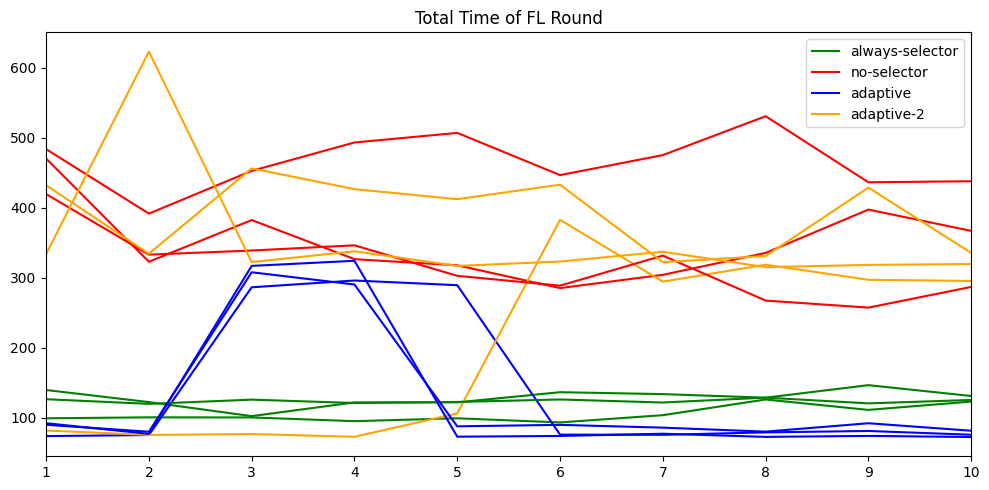

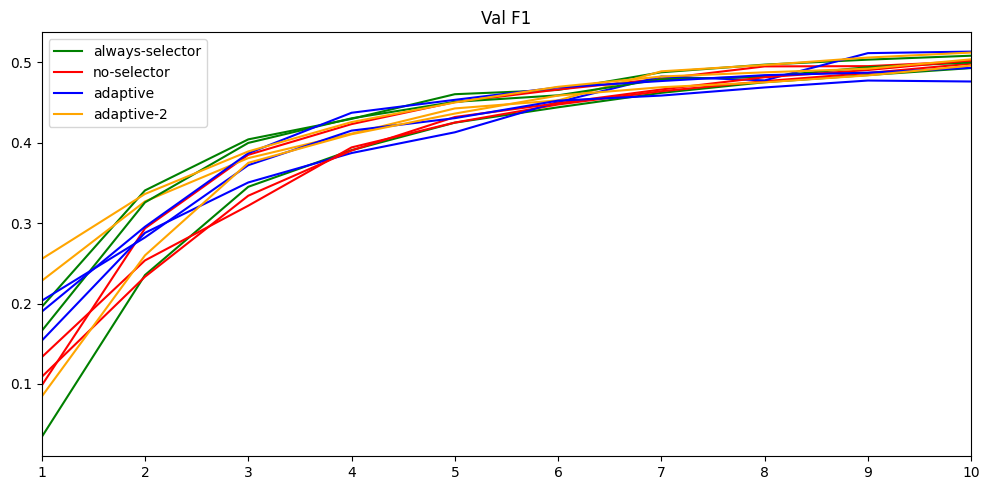

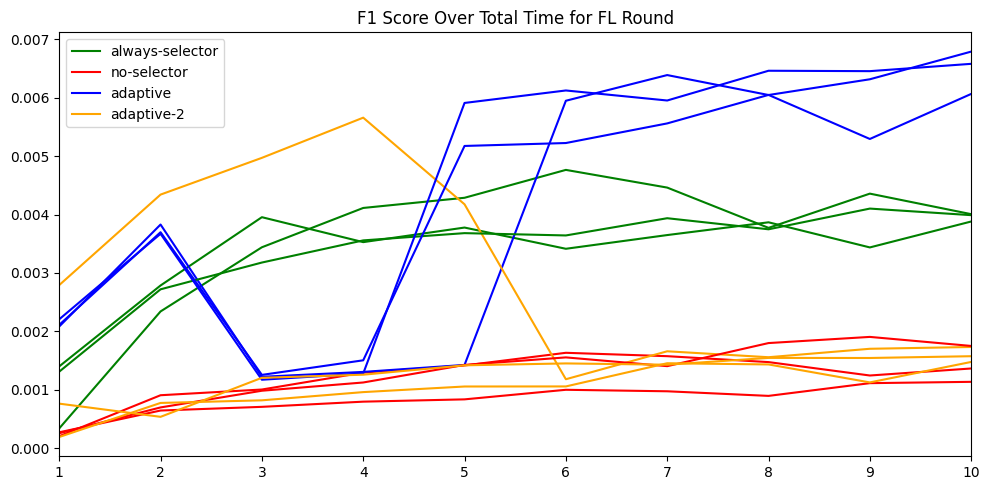

In [51]:
selected_confs = ['no-selector-icsa-B', 'always-selector-icsa-C', 'adaptive-selector-icsa', 'adaptive-selector-icsa-2']
metrics = ['Total Time of FL Round', 'Val F1', 'F1 Score Over Total Time for FL Round']

colors = {'no-selector-icsa-B': ['red', False, 'no-selector'],
          'always-selector-icsa-C': ['green', False, 'always-selector'],
          'adaptive-selector-icsa': ['blue', False, 'adaptive'],
          'adaptive-selector-icsa-2': ['orange', False, 'adaptive-2']}

for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 5))

    for exp, model_data in exp_data:
        conf = exp.split('_')[0]
        if not conf in selected_confs:
            continue
        if colors[conf][1]:
            ax.plot(model_data['FL Round'], model_data[metric], color=colors[conf][0])
        else:
            ax.plot(model_data['FL Round'], model_data[metric], color=colors[conf][0], label=colors[conf][2])
            colors[conf][1] = True

    for conf in colors:
        colors[conf][1] = False

    ax.set_title(metric)
    ax.set_xticks([i + 1 for i in range(len(model_data['FL Round']))])
    ax.set_xlim(1, len(model_data['FL Round']))
    ax.legend()

    fig.tight_layout()
    fig.savefig(metric, dpi=300)
    fig.show()

/var/folders/wf/vl_sy5yj7fjgz0r9rn5xbvf00000gn/T/ipykernel_18260/1836690321.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/wf/vl_sy5yj7fjgz0r9rn5xbvf00000gn/T/ipykernel_18260/1836690321.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/wf/vl_sy5yj7fjgz0r9rn5xbvf00000gn/T/ipykernel_18260/1836690321.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


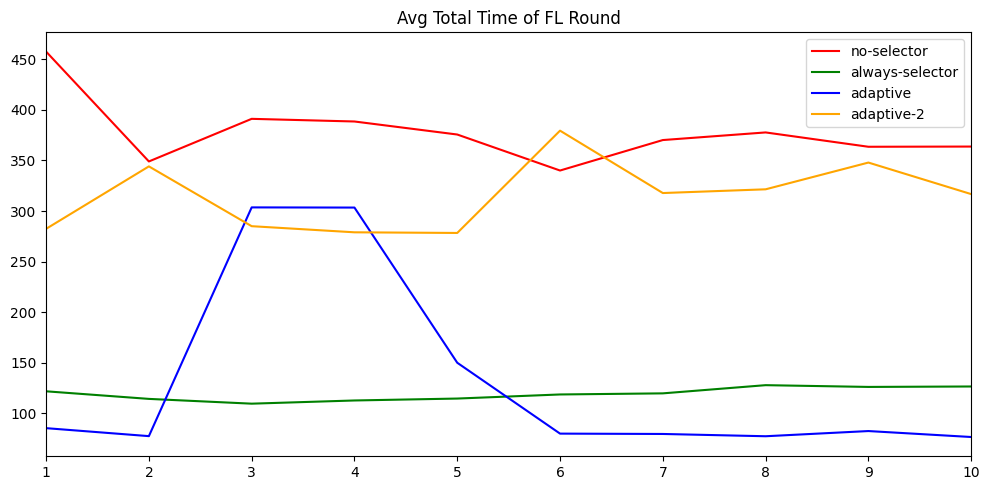

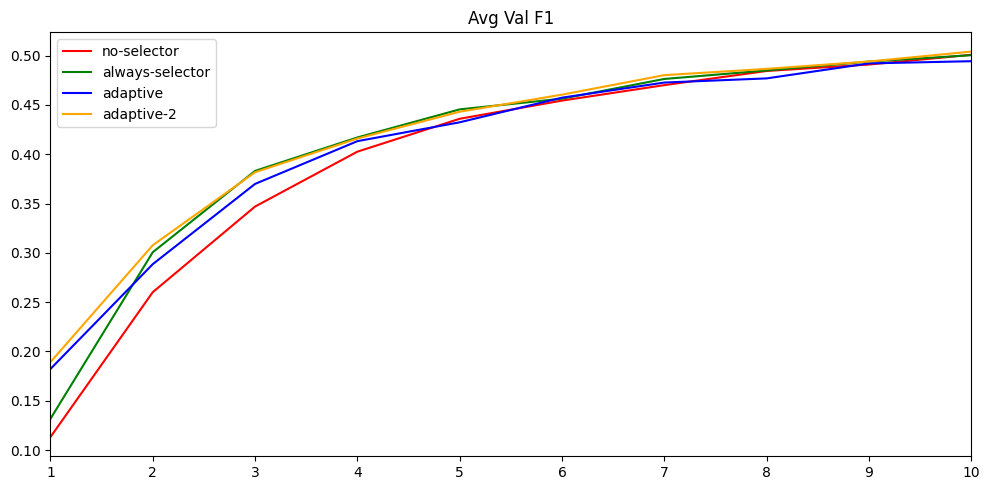

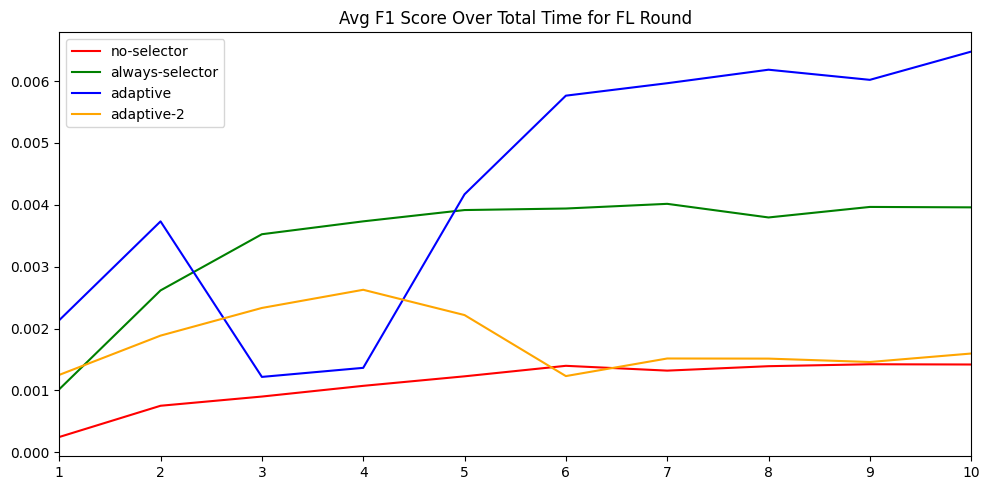

In [52]:
avg_data = {metric: {conf: [] for conf in selected_confs} for metric in metrics}

for metric in metrics:
    for conf in selected_confs:
        data = [model_data[metric].tolist() for exp, model_data in exp_data if exp.split('_')[0] == conf]
        for i in range(len(data[0])):
            avg_data[metric][conf].append(sum([v[i] for v in data]) / len(data))

    fig, ax = plt.subplots(figsize=(10, 5))

    for conf in selected_confs:
        ax.plot(avg_data[metric][conf], color=colors[conf][0], label=colors[conf][2])

    title = 'Avg ' + metric
    ax.set_title(title)
    ax.set_xticks([i for i in range(len(avg_data[metric][conf]))],
                  labels=[i + 1 for i in range(len(avg_data[metric][conf]))])
    ax.set_xlim(0, len(avg_data[metric][conf]) - 1)
    ax.legend()

    fig.tight_layout()
    fig.savefig(title, dpi=300)
    fig.show()
